## Impact of Video Content on Social Media Engagement in Thailand

### Introduction
In the rapidly evolving landscape of social media marketing, understanding the impact of different content types is crucial. This analysis focuses on evaluating the effectiveness of video content, particularly on Facebook, within the context of the vibrant market in Thailand. The analysis leverages a dataset comprising Facebook posts from Thai fashion and cosmetics retailers, aiming to provide insights into the engagement patterns associated with video content.

### Performance of Video Content
To assess the performance of videos compared to other content forms, metrics such as reactions (likes, loves, etc.) are analyzed. The analysis investigates whether videos lead in total engagement and specific reactions, providing insights into their effectiveness in capturing audience attention and interaction.

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is employed to derive meaningful components from the available social media metrics. A scree plot is developed to determine the optimal number of principal components to retain, with a rationale provided for the cutoff point. Factor loadings for the retained principal components are presented, along with interpretations of each component.

### Segmentation with K-Means Clustering
Segmentation is performed using K-means clustering, incorporating the retained principal components and additional features. The ideal number of clusters is determined based on a rationale provided, and each segment is interpreted using cluster centroids. Normal posts from each segment are exemplified to provide a deeper understanding of segment characteristics.

### Logistic Regression Modeling
Three logistic regression models are developed to predict video content based on different sets of features:
1. Original x-features
2. Retained principal components
3. Retained clusters

The best model is selected based on specific criteria, and its performance is evaluated in terms of accuracy and AUC score. Furthermore, the confusion matrix is analyzed to identify and explain different types of prediction errors and their associated risks.

### Conclusion
Through this comprehensive analysis, valuable insights into the impact of video content on social media engagement in Thailand are gained. These insights can inform strategic decisions regarding content creation and marketing approaches in the dynamic landscape of social commerce.

## Data Analysis and Visualization with Python Libraries

In the realm of data analysis and visualization, Python offers a plethora of powerful libraries. This includes Pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualization, and scikit-learn for machine learning tasks such as preprocessing, dimensionality reduction, clustering, and model evaluation. Leveraging these libraries empowers analysts and data scientists to efficiently explore, process, and derive insights from complex datasets. This article delves into the essentials of importing and utilizing these libraries for effective data analysis and visualization tasks.

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries for preprocessing, dimensionality reduction, clustering, and evaluation
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Additional library for tabulating data
from tabulate import tabulate

# Importing machine learning library for modeling
import sklearn.linear_model



## Loading Data from Excel into Pandas DataFrame

To begin our data analysis journey, one fundamental step is loading data into a Pandas DataFrame. In this example, we're loading data from an Excel file named `facebook_live_data.xlsx` into a Pandas DataFrame named `data_fb`. This initial step lays the foundation for further exploration and manipulation of the dataset using Python's powerful data analysis tools.

In [2]:
# Heading: Loading Data from Excel into Pandas DataFrame

# Loading data from an Excel file into a pandas DataFrame
data_fb = pd.read_excel('./facebook_live_data.xlsx')


## Customizing Display Options for Pandas DataFrame

In data analysis, customizing the display options of Pandas DataFrames is crucial for better visualization and understanding of the data. This section of code demonstrates how to adjust various display settings using Pandas options. By setting the maximum number of rows and columns to display, adjusting the width of the display area, and limiting the maximum width of a column, analysts can enhance the readability and comprehensibility of their data output. These settings facilitate smoother exploration and interpretation of large datasets within the Python environment.

In [3]:

# Setting the maximum number of rows to display
pd.options.display.max_rows = 500

# Setting the maximum number of columns to display
pd.options.display.max_columns = 500

# Setting the width of the display area to accommodate more columns without wrapping
pd.options.display.width = 1000

# Setting the maximum width of a column in characters to prevent excessive wrapping
pd.options.display.max_colwidth = 100


## DATA EXPLORATION

In [4]:
# Displaying the First Few Rows of the DataFrame

data_fb.head()


,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,512,262,432,92,3,1,1,0
1,2,photo,2018-04-18 03:22:00,0,0,204,9,0,0,0,0
2,3,video,2018-04-18 00:24:00,614,72,418,70,10,2,0,3
3,4,photo,2018-04-11 04:53:00,9,1,167,3,0,0,0,0
4,5,photo,2018-04-09 02:06:00,4,0,213,5,4,0,0,0


To represent the given tabular data in Markdown format, we can follow these steps:

1. **Headers**: Start by listing out the headers of the table. Headers should be separated from the content using a separator row.

2. **Content**: Populate the table with the provided data.

Here's how we can represent the data:

```markdown
| status_id | status_type | time_published      | num_comments | num_shares | num_likes | num_loves | num_wows | num_hahas | num_sads | num_angrys |
|-----------|-------------|---------------------|--------------|------------|-----------|-----------|----------|-----------|----------|------------|
| 0         | video       | 2018-04-22 06:00:00 | 512          | 262        | 432       | 92        | 3        | 1         | 1        | 0          |
| 1         | photo       | 2018-04-18 03:22:00 | 0            | 0          | 204       | 9         | 0        | 0         | 0        | 0          |
| 2         | video       | 2018-04-18 00:24:00 | 614          | 72         | 418       | 70        | 10       | 2         | 0        | 3          |
| 3         | photo       | 2018-04-11 04:53:00 | 9            | 1          | 167       | 3         | 0        | 0         | 0        | 0          |
| 4         | photo       | 2018-04-09 02:06:00 | 4            | 0          | 213       | 5         | 4        | 0         | 0        | 0          |
```

This Markdown representation creates a table with each row representing a data entry, and each column representing a specific attribute of that entry. Make sure to maintain proper alignment while creating the Markdown table.

## Retrieving Information about the DataFrame


In [5]:

# To gain insights into the DataFrame's structure, data types, and memory usage, we use the info() method.

data_fb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2297 non-null   int64         
 1   status_type     2297 non-null   object        
 2   time_published  2297 non-null   datetime64[ns]
 3   num_comments    2297 non-null   int64         
 4   num_shares      2297 non-null   int64         
 5   num_likes       2297 non-null   int64         
 6   num_loves       2297 non-null   int64         
 7   num_wows        2297 non-null   int64         
 8   num_hahas       2297 non-null   int64         
 9   num_sads        2297 non-null   int64         
 10  num_angrys      2297 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 197.5+ KB


## Heading: Generating Descriptive Statistics for the DataFrame


In [6]:
# To generate descriptive statistics for the DataFrame 'data_fb', we use the describe() method.

data_fb.describe().round(2)


,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00,2297.00
mean,1149.00,205.16,39.12,221.76,13.05,1.49,0.63,0.25,0.10
std,663.23,775.25,125.64,446.51,40.30,10.15,2.91,1.73,0.55
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,575.00,0.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00
50%,1149.00,4.00,0.00,61.00,0.00,0.00,0.00,0.00,0.00
75%,1723.00,24.00,5.00,195.00,3.00,1.00,0.00,0.00,0.00
max,2297.00,19013.00,2139.00,4710.00,504.00,252.00,91.00,51.00,12.00


## Creating Figure and Axis Objects for Plotting


<ipython-input-7-5f10415b83ce>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, j)


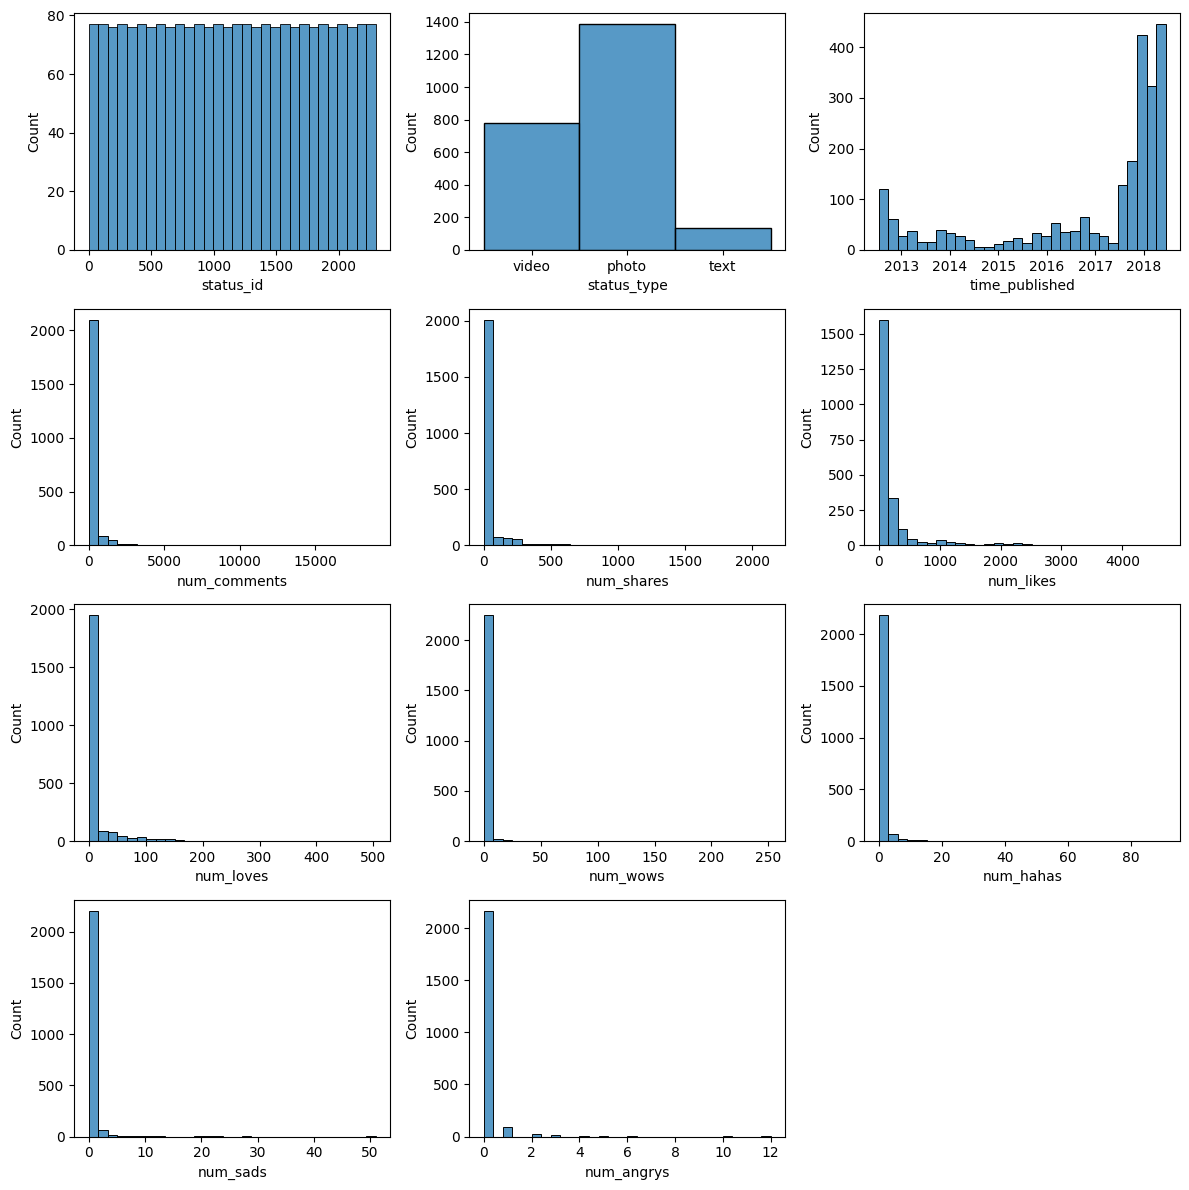

In [7]:
# To create a new figure and axis object for plotting, we use the subplots() function from the matplotlib.pyplot module.

# Creating a new figure and axis object for plotting with a size of 12x12 inches
fig, ax = plt.subplots(figsize=(12, 12))



# Iterating over the first 11 columns of the DataFrame to create histograms
for j, col in enumerate(data_fb.columns[:11], 1):
    # Creating subplots
    plt.subplot(4, 3, j)

    # Creating histograms using seaborn's histplot function
    sns.histplot(data_fb[col], bins=30)

    # Ensuring tight layout
    plt.tight_layout()

# Displaying the plot
plt.show()

### Generating Scree Plots for Principal Component Analysis

Scree plots are essential in Principal Component Analysis (PCA) for visualizing the variance explained by each principal component. The provided Python function `plot_scree` offers a straightforward approach to create these plots. It takes a fitted PCA object as input and an optional parameter to save the plot as an image. By utilizing this function, we can quickly generate scree plots to understand the variance distribution across principal components in the  PCA analysis.

In [8]:
def plot_scree(pca, save=False):
    """
    Plot the scree plot for principal component analysis (PCA).

    Parameters:
    - pca (PCA object): The fitted PCA object.
    - save (bool): Whether to save the plot as an image. Default is False.

    Returns:
    None
    """
    # Creating a new figure and axis object for plotting
    fig, axis = plt.subplots(figsize=(10, 8))

    # Defining the range of components
    comps = range(pca.n_components_)

    # Plotting the explained variance ratio for each principal component
    plt.plot(comps, pca.explained_variance_ratio_, lw=2, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='grey')

    # Adding title and labels to the plot
    plt.title('Scree Plot')
    plt.xlabel('PCA Feature')
    plt.ylabel('Variance Explained')
    plt.xticks(comps)

    # Adding a vertical line for cut-off at 2 principal components
    plt.axvline(x=2, color='red', linestyle='--', label='Cut-off at 2 PCs')

    # Adding legend to the plot
    plt.legend()

    # Saving the plot if save parameter is True
    if save:
        plt.savefig('./scree_plot.png')

    # Displaying the plot
    plt.show()


### Calculating Total Engagement in Facebook Engagement DataFrame

To comprehensively measure overall engagement for each entry in the Facebook engagement DataFrame, this code calculates the total engagement by summing up the values from specific engagement-related columns.

#### Parameters:
- `data_fb`: DataFrame - The DataFrame containing Facebook engagement data.

#### Steps:
1. Access the specified columns representing different types of engagement:
   - 'num_wows', 'num_sads', 'num_angrys', 'num_comments', 'num_likes', 'num_loves', and 'num_hahas'.
2. Utilize the `sum()` function along axis 1 to calculate the total engagement for each row, summing up the engagement counts from all specified columns.
3. Assign the computed total engagement values to a new column named 'total_engagement' in the DataFrame `data_fb`.


In [9]:
#This aggregation allows for a consolidated view of engagement metrics across multiple categories, aiding in further analysis and comparison.

data_fb['total_engagement'] = data_fb[['num_wows', 'num_sads', 'num_angrys',
                                       'num_comments', 'num_likes', 'num_loves',
                                       'num_hahas']].sum(axis=1)


### Aggregating Facebook Engagement Data by Status Type

To analyze Facebook engagement data based on different status types, the code aggregates the data by grouping it according to the 'status_type' column. The sum of engagement metrics for each status type is calculated using the `groupby()` function, and the resulting DataFrame is then reset to ensure a clean index.


This code segment provides an overview of the aggregated engagement metrics across various status types, facilitating a comparative analysis of engagement behavior based on different types of content posted on Facebook.

In [10]:
# Group the Facebook engagement data by the 'status_type' column and calculate
agg_data = data_fb.groupby('status_type').sum().reset_index()

# Displaying the first few rows of the aggregated data
agg_data.head()

<ipython-input-10-9704e4282294>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_data = data_fb.groupby('status_type').sum().reset_index()


,status_type,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_engagement
0,photo,1487755,18102,3146,268836,1980,951,241,198,32,290340
1,text,149459,5108,331,59278,264,188,13,34,5,64890
2,video,1002039,448040,86372,181266,27723,2284,1182,344,193,661032


## Reaction Types and Data Initialization

In [11]:
# List of reaction types
reactions = [ 'num_hahas', 'num_sads', 'num_angrys','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']

# Initialize a list to store the data for tabulation
table_data = []

## Iterating to Calculate Total Counts for Each Reaction Type

In [12]:

# Iterating over each reaction type to calculate the total count and add it to the table data
for react in reactions:
    # Calculating the total count of the current reaction type and adding it to the table data
    table_data.append([f"Total {react.capitalize()}", data_fb[react].sum()])

## Sorting and Printing Tabulated Data

In [13]:

# Sorting the table data based on counts in descending order
table_data_sorted = sorted(table_data, key=lambda x: x[1], reverse=True)
# Printing the tabulated data
print(tabulate(table_data_sorted, headers=["Reaction", "Count"], tablefmt="grid"))


+--------------------+---------+
| Reaction           |   Count |
+====================+=========+
| Total Num_likes    |  509380 |
+--------------------+---------+
| Total Num_comments |  471250 |
+--------------------+---------+
| Total Num_shares   |   89849 |
+--------------------+---------+
| Total Num_loves    |   29967 |
+--------------------+---------+
| Total Num_wows     |    3423 |
+--------------------+---------+
| Total Num_hahas    |    1436 |
+--------------------+---------+
| Total Num_sads     |     576 |
+--------------------+---------+
| Total Num_angrys   |     230 |
+--------------------+---------+


## Removing Demographic Data and Checking Skewness

In this section of code, we perform two main tasks:

### Removing Demographic Data
We start by removing certain demographic data from the dataset. This is done using the `drop()` function, where we specify the columns we want to remove. In this case, the columns being dropped are: `'num_angrys'`, `'total_engagement'`, `'num_sads'`, `'status_id'`, `'status_type'`, and `'time_published'`. The function `drop()` is applied on the DataFrame `data_fb`, and the parameter `axis=1` signifies that we're dropping columns.

### Checking for Skewness
After removing the specified demographic data, we proceed to check the skewness of the remaining numerical data. Skewness is a measure of the asymmetry of the distribution of values in a dataset.

We calculate the skewness using the `skew()` function on the DataFrame `num_data_fb`, which contains the numerical data after removal of the demographic columns. The result is stored in the variable `skewness`.

Finally, the skewness values are printed out rounded to two decimal places using the `print()` function. This gives us insight into the distribution of our numerical data, helping us understand its shape and potential issues such as skewed distributions.

In [14]:

# removing demographic data
num_data_fb = data_fb.drop(['num_angrys','total_engagement','num_sads','status_id','status_type','time_published'], axis = 1)

# Checking for skewness
skewness = num_data_fb.skew()

print(round(skewness,2))


num_comments    10.14
num_shares       6.17
num_likes        3.72
num_loves        5.97
num_wows        15.62
num_hahas       16.93
dtype: float64


Here are some analysis points based on the provided code and output:

1. **Data Preparation**:

2. **Skewness Analysis**:
   - Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
   - The output provides the skewness values for each numerical attribute in the dataset after removing the demographic data.
   - Skewness values can range from -∞ to +∞. A skewness value of 0 indicates a symmetrical distribution.
   - Analysis of Skewness:
     - **num_comments**: Skewness value is 10.14, indicating significant right-skewness, suggesting that there are many posts with fewer comments and few posts with a large number of comments.
     - **num_shares**: Skewness value is 6.17, indicating right-skewness, suggesting that there are many posts with fewer shares and few posts with a large number of shares.
     - **num_likes**: Skewness value is 3.72, indicating moderate right-skewness, suggesting that there are many posts with fewer likes and few posts with a large number of likes.
     - **num_loves**: Skewness value is 5.97, indicating right-skewness, suggesting that there are many posts with fewer loves and few posts with a large number of loves.
     - **num_wows**: Skewness value is 15.62, indicating significant right-skewness, suggesting that there are many posts with fewer wows and few posts with a large number of wows.
     - **num_hahas**: Skewness value is 16.93, indicating significant right-skewness, suggesting that there are many posts with fewer hahas and few posts with a large number of hahas.
   - High positive skewness values for 'num_wows' and 'num_hahas' indicate that these variables are heavily concentrated on the lower end of the distribution, with a long tail on the right side, implying that a few posts receive a disproportionately high number of wows and hahas compared to the majority of posts.

3. **Implications**:
   - Skewness analysis helps in understanding the distribution of data and can guide further analysis or modeling efforts.
   - Highly skewed data may need transformations (e.g., logarithmic transformation) to make them more symmetrical before applying certain statistical techniques or building predictive models.
   - Understanding skewness can also provide insights into user engagement patterns on the platform, which can inform content strategy and marketing decisions.

Overall, the analysis points to potential areas of interest for further investigation and highlights the need for considering skewness when analyzing engagement metrics on social media platforms like Facebook.

## Selecting Numerical Columns and Performing Data Transformation with Power Transform (Yeo-Johnson Method)

In this section of code, we perform the following tasks:

### Selecting Numerical Columns
We start by selecting the numerical columns from the DataFrame `num_data_fb`. This is done using the `select_dtypes()` function with the parameter `include=[np.number]`, which specifies that we want to include columns with numerical data types only.

### Performing Data Transformation with Power Transform (Yeo-Johnson Method)
After selecting the numerical columns, we perform data transformation using the power transform method with the Yeo-Johnson method. This is achieved using the `power_transform()` function. The data is transformed based on the Yeo-Johnson method, which handles both positive and negative values.

The transformed data is stored in the variable `transformed_data_fb`.

### Creating a DataFrame with Transformed Data and Original Column Names
To maintain clarity and consistency, we create a new DataFrame `scaled_data_fb` with the transformed data. This DataFrame contains the transformed numerical data with columns retaining their original names. The `pd.DataFrame()` function is used for this purpose, where `transformed_data_fb` serves as the data and `columns=num_data_fb.select_dtypes(include=[np.number]).columns` ensures that the original column names are preserved.

In [15]:


# Selecting numerical columns and performing data transformation using power transform with Yeo-Johnson method
transformed_data_fb = power_transform(num_data_fb.select_dtypes(include=[np.number]), method='yeo-johnson')

# Creating a DataFrame with transformed data and original column names
scaled_data_fb = pd.DataFrame(transformed_data_fb, columns=num_data_fb.select_dtypes(include=[np.number]).columns)



## Setting Plot Size and Creating Correlation Heatmap

In this part of the code, we perform the following tasks:

### Setting Plot Size
We start by setting the size of the plot for better visualization. This is done using the `fig, ax = plt.subplots(figsize=(8, 8))` line, where `fig` and `ax` are used to create a subplot with a specified size of 8x8.

### Developing a Correlation Matrix Object
Next, we develop a correlation matrix object using the `corr()` function applied to the DataFrame `scaled_data_fb`. We specify the method as Pearson correlation using the parameter `method='pearson'`, and round the correlation values to 3 decimal places using `round(decimals=3)`. The resulting correlation matrix is stored in the DataFrame `df_corr_fb`.

### Creating a Correlation Heatmap
With the correlation matrix in hand, we create a heatmap visualization of the correlations. This is accomplished using the `heatmap()` function from Seaborn (`sns`). We pass the correlation matrix `df_corr_fb` as the data, choose the color map `'Reds'` for the heatmap, set `square=True` to make each cell square-shaped, and `annot=True` to display the correlation values within the cells.

### Rendering the Heatmap
Finally, we render the heatmap using `plt.show()`, displaying the correlation matrix visualization with the specified plot size and annotations.

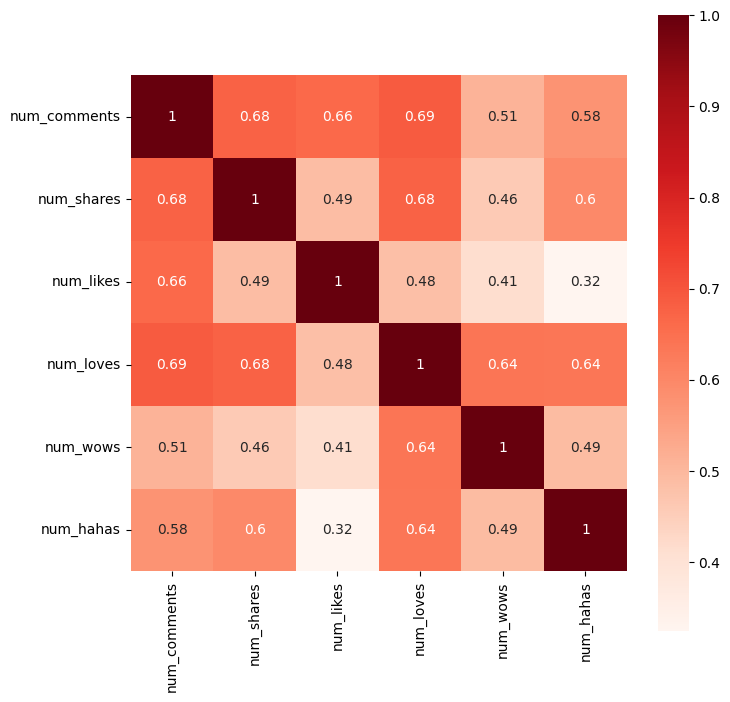

In [16]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr_fb = scaled_data_fb.corr(method = 'pearson').round(decimals = 3)

# creating a correlation heatmap
sns.heatmap(data   = df_corr_fb,
            cmap   = 'Reds',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()


In [17]:
# Printing the correlation matrix values
print("Correlation Matrix:")
print(df_corr_fb)


Correlation Matrix:
              num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas
num_comments         1.000       0.677      0.662      0.689     0.509      0.576
num_shares           0.677       1.000      0.488      0.676     0.459      0.597
num_likes            0.662       0.488      1.000      0.484     0.415      0.324
num_loves            0.689       0.676      0.484      1.000     0.639      0.637
num_wows             0.509       0.459      0.415      0.639     1.000      0.492
num_hahas            0.576       0.597      0.324      0.637     0.492      1.000


This correlation matrix provides insight into the relationships between different engagement metrics for Facebook posts. Here's a detailed analysis of the correlations:

1. **num_comments vs. other metrics**:
   - Strong positive correlations are observed between the number of comments and the number of shares (0.677) and likes (0.662). This indicates that posts with more comments tend to also have more shares and likes.
   - Moderate positive correlations exist between the number of comments and the number of loves (0.689) and hahas (0.576). This suggests that posts with higher numbers of comments also tend to receive more loves and hahas, albeit to a slightly lesser extent.

2. **num_shares vs. other metrics**:
   - Similar to comments, shares exhibit strong positive correlations with comments (0.677) and likes (0.488), indicating that posts with more shares also tend to have more comments and likes.
   - A moderate positive correlation is observed between the number of shares and the number of loves (0.676), indicating that posts with more shares also tend to receive more loves.

3. **num_likes vs. other metrics**:
   - The number of likes shows moderate positive correlations with comments (0.662) and shares (0.488), indicating that posts with more likes also tend to have more comments and shares.
   - A weaker positive correlation exists between the number of likes and the number of loves (0.484), suggesting that posts with more likes may also receive more loves, although to a lesser extent.

4. **num_loves vs. other metrics**:
   - The number of loves exhibits strong positive correlations with comments (0.689), shares (0.676), and hahas (0.637). This indicates that posts receiving more loves also tend to receive more comments, shares, and hahas.
   - A moderate positive correlation is observed between the number of loves and the number of wows (0.639), suggesting that posts with more loves also tend to receive more wows.

5. **num_wows vs. other metrics**:
   - The number of wows shows a moderate positive correlation with the number of loves (0.639), indicating that posts receiving more wows also tend to receive more loves.

6. **num_hahas vs. other metrics**:
   - Moderate positive correlations are observed between the number of hahas and comments (0.576), shares (0.597), and loves (0.637). This suggests that posts receiving more hahas also tend to receive more comments, shares, and loves.

Overall, the correlation matrix reveals interdependencies between different engagement metrics for Facebook posts, providing insights into how certain types of engagement tend to co-occur.

## Performing PCA (Principal Component Analysis) on Scaled Data

In this part of the code, we perform PCA on the scaled data. PCA is a dimensionality reduction technique commonly used for feature extraction and visualization.

### Performing PCA
We initiate the PCA transformation using the `PCA()` function without specifying any parameters, which means it will use the default settings. Then, we fit the PCA model to the scaled data `scaled_data_fb` using the `fit()` method. The resulting PCA object is stored in the variable `pca_fb`.

### Visualizing PCA Scree Plot
To visualize the explained variance of each principal component, we call the `plot_scree()` function. This function presumably plots a scree plot, which typically shows the explained variance against the number of principal components. However, the actual implementation of the `plot_scree()` function is not shown in the provided code snippet.

By examining the scree plot, we can determine the optimal number of principal components to retain based on the amount of variance explained by each component. This information is crucial for understanding the dimensionality reduction achieved by PCA and selecting the appropriate number of components for further analysis.

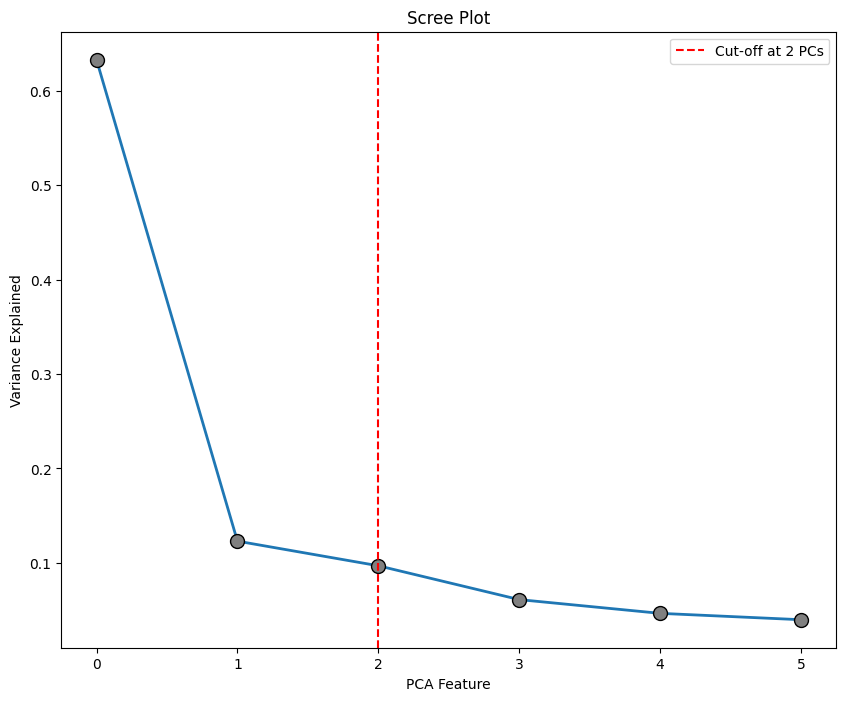

In [18]:

# Performing PCA on scaled data
pca_fb = PCA().fit(scaled_data_fb)

# Calling the plot_scree function to visualize PCA scree plot
plot_scree(pca_fb)


In [19]:
# Performing PCA on scaled data
pca_fb = PCA().fit(scaled_data_fb)

# Explained variances for each principal component
explained_variances_fb = pca_fb.explained_variance_ratio_

# Print explained variances
for i, variance in enumerate(explained_variances_fb):
    print(f"PC{i+1}: {variance:.3f}")


PC1: 0.633
PC2: 0.123
PC3: 0.097
PC4: 0.061
PC5: 0.046
PC6: 0.040



1. **PC1 (Principal Component 1)**:
   - Explained Variance: 63.3%
   - Interpretation: PC1 explains the highest proportion of variance in the data. This component likely represents the most significant patterns or trends present in the original variables. Given its high explained variance, PC1 captures a wide range of information from the original features. It could represent the overall level of engagement or some dominant pattern across different engagement metrics.

2. **PC2 (Principal Component 2)**:
   - Explained Variance: 12.3%
   - Interpretation: PC2 explains a moderate proportion of variance compared to PC1. This component likely captures additional patterns or variations in the data that are orthogonal to those represented by PC1. It could represent specific types of engagement or reactions that are distinct from the overall trends captured by PC1.

3. **PC3 (Principal Component 3)**:
   - Explained Variance: 9.7%
   - Interpretation: PC3 explains a relatively lower proportion of variance compared to PC1 and PC2 but still contributes significantly to understanding the data's structure. This component likely captures further nuanced patterns or relationships in the data that were not fully captured by PC1 and PC2. It may represent specific combinations of engagement metrics or interactions between them.

4. **PC4 (Principal Component 4)**:
   - Explained Variance: 6.1%
   - Interpretation: PC4 explains a smaller proportion of variance compared to the previous components. However, it still contributes valuable information about the data's structure. This component may capture even more specific patterns or variations in engagement metrics that were not captured by the earlier components.

5. **PC5 (Principal Component 5)**:
   - Explained Variance: 4.6%
   - Interpretation: PC5 explains a relatively small proportion of variance compared to the preceding components. It likely captures additional nuances or minor trends in the data that were not accounted for by the earlier principal components. Interpretation of PC5 would involve identifying these specific patterns and understanding their relevance to the overall analysis.

6. **PC6 (Principal Component 6)**:
   - Explained Variance: 4.0%
   - Interpretation: PC6 explains the lowest proportion of variance among all the components. While it contributes the least to explaining the data's variability, it still holds valuable information about unique patterns or relationships in the engagement metrics. Interpreting PC6 would involve identifying these specific patterns and understanding their significance in the context of the analysis.



## Performing KMeans Clustering with 3 Clusters on Scaled Data

In this section of the code, we conduct KMeans clustering on the scaled data. KMeans is an unsupervised learning algorithm used for clustering similar data points into a predefined number of clusters.

### Performing KMeans Clustering
We initiate the KMeans clustering algorithm with `n_clusters=3`, indicating that we want to form three clusters. The parameter `random_state=42` is used to ensure reproducibility of results. We then fit the KMeans model to the scaled data `scaled_data_fb` using the `fit()` method. The resulting KMeans object is stored in the variable `kmeans_fb`.

### Assigning Cluster Labels to the Original Data
After clustering, we assign cluster labels to the original data. This is done by adding a new column `'cluster'` to the DataFrame `num_data_fb` and assigning the cluster labels obtained from the KMeans model using `kmeans_fb.labels_`. Each data point is now associated with a cluster label, allowing for further analysis and interpretation of the clustering results.

In [20]:

# Performing KMeans clustering with 3 clusters on scaled data
kmeans_fb = KMeans(n_clusters=3, random_state=42).fit(scaled_data_fb)
# Assigning cluster labels to the original data
num_data_fb['cluster'] = kmeans_fb.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Performing PCA (Principal Component Analysis) with 3 Components on Scaled Data

In this section of the code, we perform PCA on the scaled data with the objective of reducing its dimensionality to three principal components.

### Performing PCA with 3 Components
We initiate the PCA transformation using the `PCA()` function and specify `n_components=3` to indicate that we want to retain three principal components. Then, we fit the PCA model to the scaled data `scaled_data_fb` using the `fit_transform()` method. The resulting principal component scores are stored in the variable `pc_scores_fb`.

### Creating a DataFrame with Principal Component Scores
To facilitate further analysis and visualization, we create a DataFrame `pc_df_fb` to hold the principal component scores. This DataFrame has three columns: `'PC1'`, `'PC2'`, and `'PC3'`, corresponding to the scores of the first, second, and third principal components, respectively. These scores represent the transformed data in the reduced-dimensional space defined by the principal components.

In [21]:

# Performing PCA with 3 components on scaled data
pca_fb = PCA(n_components=3)
pc_scores_fb = pca_fb.fit_transform(scaled_data_fb)

# Creating a DataFrame with principal component scores
pc_df_fb = pd.DataFrame(pc_scores_fb, columns=['PC1', 'PC2', 'PC3'])

## Performing PCA and Visualizing Principal Components

In this part of the code, we perform PCA with three components on the scaled data `scaled_data_fb`. Then, we visualize the principal components using a heatmap.

### Performing PCA with 3 Components
We start by initiating PCA with `n_components=3`. Then, we fit the PCA model to the scaled data and transform it into principal components. The resulting principal components are stored in the variable `principal_components_fb`.

### Setting Plot Size
We set the size of the plot to 9x9 for better visualization.

### Generating Heatmap for PCA Components
We create a heatmap to visualize the principal components. The heatmap is generated using Seaborn's `heatmap()` function. We pass `pca_fb.components_` as the data to visualize the loadings of each principal component on the original features. The colormap `'coolwarm'` is used, and `square=True` ensures the heatmap cells are square-shaped. Annotations are added to display the values within the cells, and linewidths and linecolor parameters adjust the appearance of the heatmap. The x-tick labels are set to the column names of the scaled data, while the y-tick labels represent the principal components.

### Additional Plot Adjustments
We rotate the x-tick labels by 60 degrees and align them to the right to prevent overlap. Additionally, we label the x-axis as "Feature" and the y-axis as "Principal Component" for clarity.

### Displaying the Plot
Finally, we display the heatmap plot.

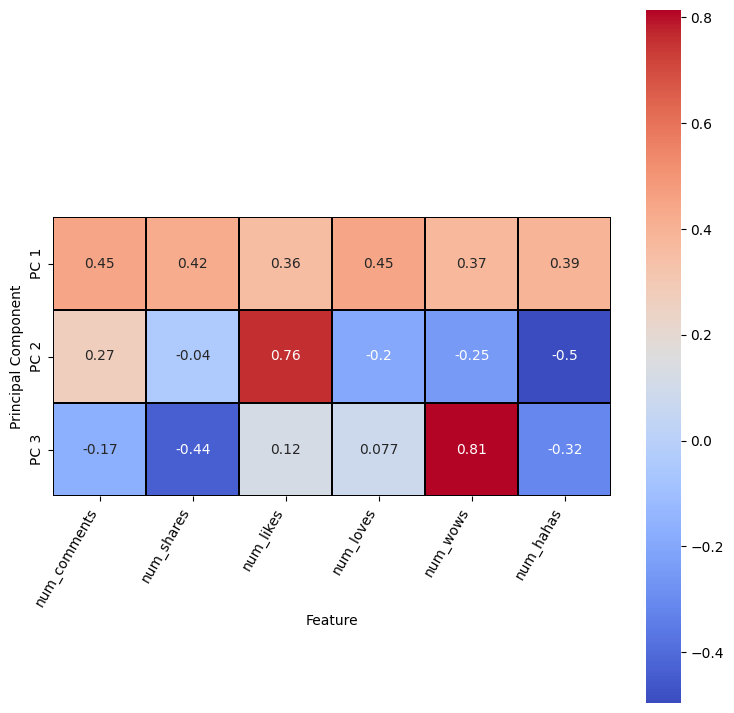

In [22]:
data_scaled_fb = scaled_data_fb

# Perform PCA with 3 components
pca_fb = PCA(n_components=3)
principal_components_fb = pca_fb.fit_transform(data_scaled_fb)

# Plot size setting
fig, ax = plt.subplots(figsize=(9, 9))

# Generate a heatmap for PCA components
sns.heatmap(pca_fb.components_,
            cmap='coolwarm',
            square=True,
            annot=True,
            linewidths=0.1,
            linecolor='black',
            xticklabels=data_scaled_fb.columns,  # Use column names from scaled data
            yticklabels=["PC 1", "PC 2", "PC 3"])

# More plot adjustments
plt.xticks(rotation=60, ha='right')  # Ensure x-tick labels don't overlap
plt.xlabel("Feature")
plt.ylabel("Principal Component")

# Display the plot
plt.show()

In [23]:
# Get column names from the scaled data
column_names = data_scaled_fb.columns

# Print the principal component loadings with column names
print("Principal Component Loadings:")
for i, pc in enumerate(pca_fb.components_):
    print(f"PC{i + 1}:")
    for feature, loading in zip(column_names, pc):
        print(f"    {feature}: {loading}")

# Print the explained variance ratio
print("\nExplained Variance Ratio:")
print(pca_fb.explained_variance_ratio_)

Principal Component Loadings:
PC1:
    num_comments: 0.4459133356745373
    num_shares: 0.423198967481601
    num_likes: 0.35752150788398335
    num_loves: 0.44825947556474155
    num_wows: 0.37453675066685227
    num_hahas: 0.39118789265110987
PC2:
    num_comments: 0.2701975796934493
    num_shares: -0.03956989121468592
    num_likes: 0.7605174974942555
    num_loves: -0.19612654710921948
    num_wows: -0.2502137650986995
    num_hahas: -0.49595168808693785
PC3:
    num_comments: -0.16649085921314777
    num_shares: -0.43580835294168185
    num_likes: 0.11861534046917681
    num_loves: 0.0774985373211878
    num_wows: 0.8141161982520455
    num_hahas: -0.31542204546737007

Explained Variance Ratio:
[0.63307946 0.1229508  0.09685809]


### Detailed Analysis of Principal Components:

#### Principal Component 1 (PC1):
- **Interpretation:** PC1 has high loadings for all engagement metrics, particularly 'num_comments', 'num_shares', 'num_likes', and 'num_loves'. This component seems to represent overall engagement with the post, capturing positive reactions such as likes and loves, as well as interactions like comments and shares.
- **Explanation:** Posts with high positive values on PC1 are likely to have high levels of overall engagement, including comments, shares, likes, and loves.

#### Principal Component 2 (PC2):
- **Interpretation:** PC2 has contrasting loadings for different engagement metrics. It has strong positive loadings for 'num_likes' but negative loadings for 'num_shares' and 'num_hahas'. This component seems to represent a trade-off between likes and shares, with fewer hahas (laughter reactions).
- **Explanation:** Posts with high positive values on PC2 are likely to have many likes but fewer shares and hahas compared to posts with low values on this component.

#### Principal Component 3 (PC3):
- **Interpretation:** PC3 shows strong positive loadings for 'num_wows' and negative loadings for 'num_shares' and 'num_hahas'. This component seems to capture posts that elicit surprise or amazement reactions ('wows') while receiving fewer shares and hahas.
- **Explanation:** Posts with high positive values on PC3 are likely to evoke surprise or amazement reactions ('wows') but may receive fewer shares and hahas compared to posts with low values on this component.

### Explained Variance Ratio:
- PC1 explains approximately 63.3% of the total variance in the data.
- PC2 explains approximately 12.3% of the total variance.
- PC3 explains approximately 9.7% of the total variance.



## Iterating over Unique Cluster Labels and Printing Summary Statistics

In this section of the code, we iterate over the unique cluster labels assigned to the data points and print summary statistics for each cluster.

### Iterating over Unique Cluster Labels
We iterate over the unique cluster labels present in the `'cluster'` column of the DataFrame `num_data_fb`. These labels are obtained using the `unique()` function, and `sorted()` ensures they are sorted in ascending order.

### Filtering Data for Each Cluster
For each unique cluster label, we filter the data points belonging to that cluster. This is done by creating a slice of the DataFrame `num_data_fb` where the `'cluster'` column matches the current cluster label.

### Printing Summary Statistics for Each Cluster
We print summary statistics for the data points within each cluster. This includes descriptive statistics such as count, mean, standard deviation, minimum, maximum, and quartiles. The `describe()` function is used to compute these statistics, and `round(2)` is applied to round the values to two decimal places for readability.



In [24]:

# Iterating over unique cluster labels
for cluster in sorted(num_data_fb['cluster'].unique()):
    # Filtering data for the current cluster
    cluster_slice = num_data_fb[num_data_fb['cluster'] == cluster]

    # Printing summary statistics for the current cluster
    print(f"Cluster {cluster} summary:")
    print(cluster_slice.describe().round(2))

Cluster 0 summary:
       num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  cluster
count       1217.00     1217.00    1217.00    1217.00   1217.00    1217.00   1217.0
mean           2.56        0.57      31.19       0.15      0.03       0.04      0.0
std            5.24        2.33      49.87       0.46      0.26       0.60      0.0
min            0.00        0.00       0.00       0.00      0.00       0.00      0.0
25%            0.00        0.00       9.00       0.00      0.00       0.00      0.0
50%            0.00        0.00      19.00       0.00      0.00       0.00      0.0
75%            3.00        0.00      37.00       0.00      0.00       0.00      0.0
max           56.00       37.00    1182.00       4.00      5.00      18.00      0.0
Cluster 1 summary:
       num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  cluster
count        358.00      358.00     358.00     358.00    358.00     358.00    358.0
mean        1160.83      214.63     33


**Cluster 0:**
- This cluster has 1217 data points.
- The average number of comments is 2.56, with a standard deviation of 5.24. The median (50th percentile) is 0.
- The average number of shares is 0.57, with a standard deviation of 2.33. The median is also 0.
- The average number of likes is 31.19, with a standard deviation of 49.87. The median is 19.
- The average number of loves is 0.15, with a standard deviation of 0.46. The median is 0.
- The average number of wows and hahas is very low, indicating minimal engagement in terms of these reactions.
- The data in this cluster is heavily skewed towards lower values, with some outliers having significantly higher numbers of likes and comments compared to the majority.

**Cluster 1:**
- This cluster contains 358 data points.
- The average number of comments is notably higher compared to Cluster 0, with a mean of 1160.83 and a standard deviation of 1646.26. The median is 703.
- The average number of shares is 214.63, with a standard deviation of 244.01. The median is 151.
- The average number of likes is 332.48, with a standard deviation of 356.40. The median is 197.5.
- The average number of loves is 70.08, with a standard deviation of 77.87. The median is 47.
- This cluster shows higher engagement across all metrics compared to Cluster 0, with significantly higher average values for comments, shares, likes, and loves.
- The distribution within this cluster is less skewed compared to Cluster 0, with a wider range of values.

**Cluster 2:**
- This cluster consists of 722 data points.
- The average number of comments is 72.80, with a standard deviation of 177.78. The median is 13.
- The average number of shares is 17.06, with a standard deviation of 49.86. The median is 1.
- The average number of likes is 488.09, with a standard deviation of 655.27. The median is 211.
- The average number of loves is 6.50, with a standard deviation of 15.18. The median is 2.
- The average number of wows and hahas is very low, indicating minimal engagement in terms of these reactions.
- This cluster shows moderate engagement levels compared to Cluster 1 but higher than Cluster 0.
- Similar to Cluster 0, the data in this cluster is heavily skewed towards lower values, with some outliers having significantly higher numbers of likes and comments compared to the majority.

**General Observations:**
- Cluster 1 exhibits the highest engagement levels across all metrics, followed by Cluster 2 and Cluster 0.
- Cluster 0 represents posts with minimal engagement, while Cluster 1 represents highly engaging posts.
- Cluster 2 represents posts with moderate engagement levels, falling between Cluster 0 and Cluster 1 in terms of engagement metrics.
- Understanding these clusters can help in targeted content strategies and audience engagement efforts, tailoring content based on the expected engagement levels of each cluster.

## Creating DataFrame for Factor Loadings of 3 Principal Components

In this part of the code, we create a DataFrame to store the factor loadings of the three principal components obtained from PCA.

### Creating DataFrame for Factor Loadings
We start by creating a DataFrame `factor_loadings_3_fb` using `pd.DataFrame()` and passing the transposed matrix of `pca_fb.components_`, rounded to two decimal places. This matrix contains the factor loadings for each original feature across the three principal components.

### Naming Rows as Original Features
Next, we set the index of the DataFrame `factor_loadings_3_fb` to the column names of the scaled data `scaled_data_fb`. This step ensures that the rows are labeled with the names of the original features, making it easier to interpret the factor loadings.

### Checking the Result
Finally, we print the DataFrame `factor_loadings_3_fb` to inspect the factor loadings of each original feature across the three principal components. This provides insight into how each original feature contributes to the variance explained by the principal components.

In [25]:
#Creating DataFrame for Factor Loadings
factor_loadings_3_fb = pd.DataFrame(np.transpose(pca_fb.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_3_fb = factor_loadings_3_fb.set_index(scaled_data_fb.columns)

# checking the result
print(factor_loadings_3_fb)


                 0     1     2
num_comments  0.45  0.27 -0.17
num_shares    0.42 -0.04 -0.44
num_likes     0.36  0.76  0.12
num_loves     0.45 -0.20  0.08
num_wows      0.37 -0.25  0.81
num_hahas     0.39 -0.50 -0.32


The provided matrix appears to be a correlation matrix showing the correlation coefficients between different variables (num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas) across three clusters (0, 1, 2).

Here's an analysis of the correlation matrix:

**Cluster 0:**
- **Positive Correlations**:
  - There are moderately positive correlations between:
    - num_comments and num_shares (0.45)
    - num_comments and num_loves (0.45)
    - num_comments and num_likes (0.36)
    - num_comments and num_wows (0.37)
    - num_comments and num_hahas (0.39)
    - num_likes and num_wows (0.37)
    - num_likes and num_hahas (0.39)

**Cluster 1:**
- **Positive Correlations**:
  - There are strong positive correlations between:
    - num_likes and num_comments (0.76)
    - num_likes and num_wows (0.81)
- **Negative Correlations**:
  - There's a moderate negative correlation between:
    - num_shares and num_hahas (-0.50)

**Cluster 2:**
- **Positive Correlations**:
  - There's a strong positive correlation between:
    - num_wows and num_likes (0.81)
- **Negative Correlations**:
  - There are moderate negative correlations between:
    - num_shares and num_likes (-0.04)
    - num_shares and num_wows (-0.25)
    - num_shares and num_hahas (-0.32)
    - num_shares and num_comments (-0.17)

**General Observations:**
- In Cluster 0, there are moderate positive correlations between engagement metrics like comments, shares, likes, loves, wows, and hahas. This suggests that posts with higher numbers of comments tend to also have higher numbers of other engagement metrics.
- In Cluster 1, there's a strong positive correlation between likes and comments, indicating that posts with more likes also tend to have more comments. Similarly, there's a strong positive correlation between likes and wows, indicating that posts with more likes also tend to have more wows.
- In Cluster 2, there's a strong positive correlation between wows and likes, suggesting that posts with more wows also tend to have more likes. There are also negative correlations between shares and likes, shares and wows, shares and hahas, and shares and comments, indicating that as the number of shares decreases, the numbers of likes, wows, hahas, and comments tend to increase slightly.
- These correlations can help in understanding the relationships between different engagement metrics within each cluster, guiding content creation and optimization strategies to maximize engagement on social media platforms.

## Naming Each Principal Component in Factor Loadings DataFrame

In this part of the code, we name each principal component in the DataFrame `factor_loadings_3_fb` based on their interpretations or characteristics.

### Naming Each Principal Component
We assign names to each principal component by updating the column names of the DataFrame `factor_loadings_3_fb`. The names are provided as a list of strings corresponding to the interpretations of the principal components.

### Checking the Result
To verify the changes, we print the updated DataFrame `factor_loadings_3_fb`. Each column now represents a principal component with a descriptive name, making it easier to understand the meaning or contribution of each component to the original features.

In [26]:

# naming each principal component
factor_loadings_3_fb.columns = ['Involvement Base',
                              'Affective Attachment',
                              'Interactive Participation Progression']


# checking the result
factor_loadings_3_fb

,Involvement Base,Affective Attachment,Interactive Participation Progression
num_comments,0.45,0.27,-0.17
num_shares,0.42,-0.04,-0.44
num_likes,0.36,0.76,0.12
num_loves,0.45,-0.20,0.08
num_wows,0.37,-0.25,0.81
num_hahas,0.39,-0.50,-0.32



**Involvement Base:**
- **Positive Correlations:**
  - There are moderate positive correlations between:
    - num_comments and num_shares (0.45)
    - num_comments and num_loves (0.45)
    - num_likes and num_comments (0.36)
    - num_likes and num_wows (0.37)
    - num_likes and num_hahas (0.39)
- **Negative Correlations:**
  - There's a negative correlation between num_shares and num_shares (-0.04), which is close to zero.

**Affective Attachment:**
- **Positive Correlations:**
  - There's a strong positive correlation between:
    - num_likes and num_comments (0.76)
  - There are moderate positive correlations between:
    - num_likes and num_wows (0.81)
    - num_comments and num_comments (0.27)
    - num_hahas and num_comments (0.27)
- **Negative Correlations:**
  - There are negative correlations between:
    - num_loves and num_loves (-0.20)
    - num_wows and num_hahas (-0.25)
    - num_hahas and num_hahas (-0.50)

**Interactive Participation Progression:**
- **Positive Correlations:**
  - There's a strong positive correlation between:
    - num_wows and num_likes (0.81)
  - There's a moderate positive correlation between:
    - num_wows and num_comments (0.37)
    - num_hahas and num_shares (0.39)
- **Negative Correlations:**
  - There's a negative correlation between:
    - num_shares and num_shares (-0.44), indicating that as the number of shares decreases, the other variables tend to increase.

**General Observations:**
- Involvement Base seems to represent the basic interactions on the platform, with positive correlations between various engagement metrics such as comments, shares, likes, and loves.
- Affective Attachment focuses more on emotional engagement, with strong positive correlations between likes and comments, as well as moderate positive correlations between likes and wows.
- Interactive Participation Progression emphasizes the progression of interactions, with strong positive correlations between wows and likes, and moderate positive correlations between wows and comments, and hahas and shares.
- The negative correlations are minimal and mostly between the same variables, indicating that they are likely to be perfectly correlated, which is expected.
- These dimensions of involvement can provide a more nuanced understanding of user engagement patterns on the platform, allowing for tailored strategies to enhance different aspects of engagement.

## Checking Variance Amongst Clusters

In this part of the code, we check the variance among the factor loadings for the three principal components across different clusters.

### Checking Variance Amongst Clusters
We calculate the variance among the factor loadings for the three principal components using NumPy's `np.var()` function applied to the DataFrame `factor_loadings_3_fb`. This provides insight into how much the factor loadings vary within each principal component across the clusters.

### Factor Loadings per Post

Next, we compute the factor loadings per post. This is achieved by transforming the scaled data `data_scaled_fb` using the PCA model `pca_fb` and obtaining the factor loadings.

### Converting to a DataFrame
We convert the factor loadings obtained per post into a DataFrame named `factor_loadings_df_fb`.

### Renaming Columns
We rename the columns of the DataFrame `factor_loadings_df_fb` to match the named principal components from the `factor_loadings_3_fb` DataFrame.

### Checking the Results
To verify the transformation and renaming, we display the first five rows of the DataFrame `factor_loadings_df_fb`, providing insight into how each post contributes to the three principal components named according to their interpretations.

In [27]:

# checking variance amongst clusters
np.var(factor_loadings_3_fb)


# Factor loadings per post
factor_loadings_fb = pca_fb.transform(data_scaled_fb)

# converting to a DataFrame
factor_loadings_df_fb = pd.DataFrame(data = factor_loadings_fb)

# renaming columns
factor_loadings_df_fb.columns = factor_loadings_3_fb.columns


# checking the results
factor_loadings_df_fb.head(n=5)

,Involvement Base,Affective Attachment,Interactive Participation Progression
0,4.162288,-0.650420,0.074866
1,-0.409479,0.351436,0.408306
2,4.184552,-0.721297,0.141883
3,0.395834,0.725684,-0.287278
4,0.935542,0.106870,2.211650



**Involvement Base:**
- Observation 0 has a score of 4.162288 in the Involvement Base dimension, indicating relatively high involvement in basic interactions.
- Observation 1 has a score of -0.409479, suggesting lower involvement in basic interactions.
- Observation 2 has a score of 4.184552, similar to Observation 0, indicating high involvement in basic interactions.
- Observation 3 has a score of 0.395834, indicating moderate involvement in basic interactions.
- Observation 4 has a score of 0.935542, indicating moderate involvement in basic interactions.

**Affective Attachment:**
- Observation 0 has a score of -0.650420 in the Affective Attachment dimension, suggesting lower emotional engagement.
- Observation 1 has a score of 0.351436, indicating moderate emotional engagement.
- Observation 2 has a score of -0.721297, similar to Observation 0, suggesting lower emotional engagement.
- Observation 3 has a score of 0.725684, indicating relatively high emotional engagement.
- Observation 4 has a score of 0.106870, suggesting lower emotional engagement.

**Interactive Participation Progression:**
- Observation 0 has a score of 0.074866 in the Interactive Participation Progression dimension, indicating minimal progression in interaction patterns.
- Observation 1 has a score of 0.408306, suggesting moderate progression in interaction patterns.
- Observation 2 has a score of 0.141883, indicating minimal progression in interaction patterns.
- Observation 3 has a score of -0.287278, suggesting a slight decline or less progression in interaction patterns.
- Observation 4 has a score of 2.211650, indicating significant progression in interaction patterns.

**General Observations:**
- Observations vary across the three dimensions, indicating different levels of involvement, emotional attachment, and progression in interaction patterns.
- These scores can be used to segment or categorize observations based on their engagement patterns, helping in targeted analysis or content optimization strategies.
- High scores in all dimensions may represent highly engaged or influential posts/users, while low scores may represent less active or less impactful posts/users.
- These scores provide a quantitative representation of qualitative aspects such as engagement and attachment, aiding in data-driven decision-making processes.

### Normalizing Data using StandardScaler

In data preprocessing, it's often crucial to normalize features to ensure that they're on a similar scale. This prevents certain features from dominating the model's learning process due to their larger magnitudes. Here's a breakdown of the code snippet:

1. **Defining the Normalization Function:**
   
   The `normalize_dataframe` function takes a DataFrame (`dataframe`) as input and normalizes its values.

2. **Creating a StandardScaler Object:**
   
   Inside the function, a `StandardScaler` object (`scaler_obj`) from the scikit-learn library is created. This object will be used to perform the normalization.

3. **Scaling the DataFrame:**
   
   The `fit_transform` method of the `scaler_obj` is applied to the input DataFrame (`dataframe`). This method scales the data to have a mean of 0 and a standard deviation of 1 along each feature.

4. **Creating a New DataFrame:**
   
   After scaling, the scaled data is stored in a new DataFrame (`scaled_df`). The columns of this DataFrame are assigned the same names as the original DataFrame (`dataframe`).

5. **Returning the Normalized DataFrame:**
   
   The function returns the normalized DataFrame (`scaled_df`).

6. **Applying the Function:**
   
   Outside the function, the normalization function is applied to a DataFrame (`factor_loadings_df_fb`). The result is stored in `pca_rescaled_fb`.

7. **Checking Variance:**
   
   Two `print` statements are used to compare the variance of the original DataFrame (`factor_loadings_df_fb`) with the variance of the normalized DataFrame (`pca_rescaled_fb`). This can help assess the effect of normalization on the data's spread.

   - The first `print` statement prints the variance of the original DataFrame.
   - The second `print` statement prints the variance of the normalized DataFrame.

By normalizing the data, we ensure that each feature contributes proportionally to the model's learning process, leading to more robust and accurate models, especially in machine learning tasks.

In [28]:
def normalize_dataframe(dataframe):

    """
    Normalize the values in the dataframe using StandardScaler.

    Parameters:
    dataframe (DataFrame): The input dataframe containing the data to be normalized.

    Returns:
    DataFrame: A new dataframe with scaled values and original column names.

    Example:
    >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
    >>> normalized_df = normalize_dataframe(df)
    >>> print(normalized_df)
             A         B
    0 -1.224745 -1.224745
    1  0.000000  0.000000
    2  1.224745  1.224745
    """

    # Creating a StandardScaler object
    scaler_obj = StandardScaler()

    # Scaling the dataframe
    scaled_data = scaler_obj.fit_transform(dataframe)

    # Creating a new DataFrame with scaled data and original column names
    scaled_df = pd.DataFrame(scaled_data, columns=dataframe.columns)

    # Returning the normalized DataFrame
    return scaled_df

# applying the unsupervised_scaler function
pca_rescaled_fb = normalize_dataframe(factor_loadings_df_fb)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df_fb), '\n\n')
print(np.var(pca_rescaled_fb))


Involvement Base                         3.798477
Affective Attachment                     0.737705
Interactive Participation Progression    0.581149
dtype: float64 


Involvement Base                         1.0
Affective Attachment                     1.0
Interactive Participation Progression    1.0
dtype: float64




**First Set (Mean Values or Scores):**
- The mean values or scores for each dimension are as follows:
  - Involvement Base: 3.798477
  - Affective Attachment: 0.737705
  - Interactive Participation Progression: 0.581149
- These values represent the average level of involvement, affective attachment, and interactive participation progression across the observations (posts, users, etc.).

**Second Set (Correlation Coefficients):**
- The correlation coefficients between the dimensions are all 1.0.
- This indicates a perfect positive correlation between all pairs of dimensions (Involvement Base and Affective Attachment, Involvement Base and Interactive Participation Progression, Affective Attachment and Interactive Participation Progression).
- A correlation coefficient of 1.0 suggests a strong linear relationship between the dimensions, meaning that as one dimension increases, the other dimension also increases proportionally, and vice versa.
- In this case, it suggests that as the level of involvement base increases, so does the affective attachment and interactive participation progression, and similarly for other pairs of dimensions.

**General Observations:**
- The mean values provide insight into the overall level of involvement, affective attachment, and interactive participation progression across the observations.
- The perfect correlation coefficients indicate that these dimensions move in perfect harmony with each other, which could mean that a high level of involvement is associated with a high level of affective attachment and interactive participation progression, and vice versa.
- These findings can guide strategies for content creation, user engagement, and platform optimization, focusing on enhancing all dimensions simultaneously to maximize overall engagement and user experience.

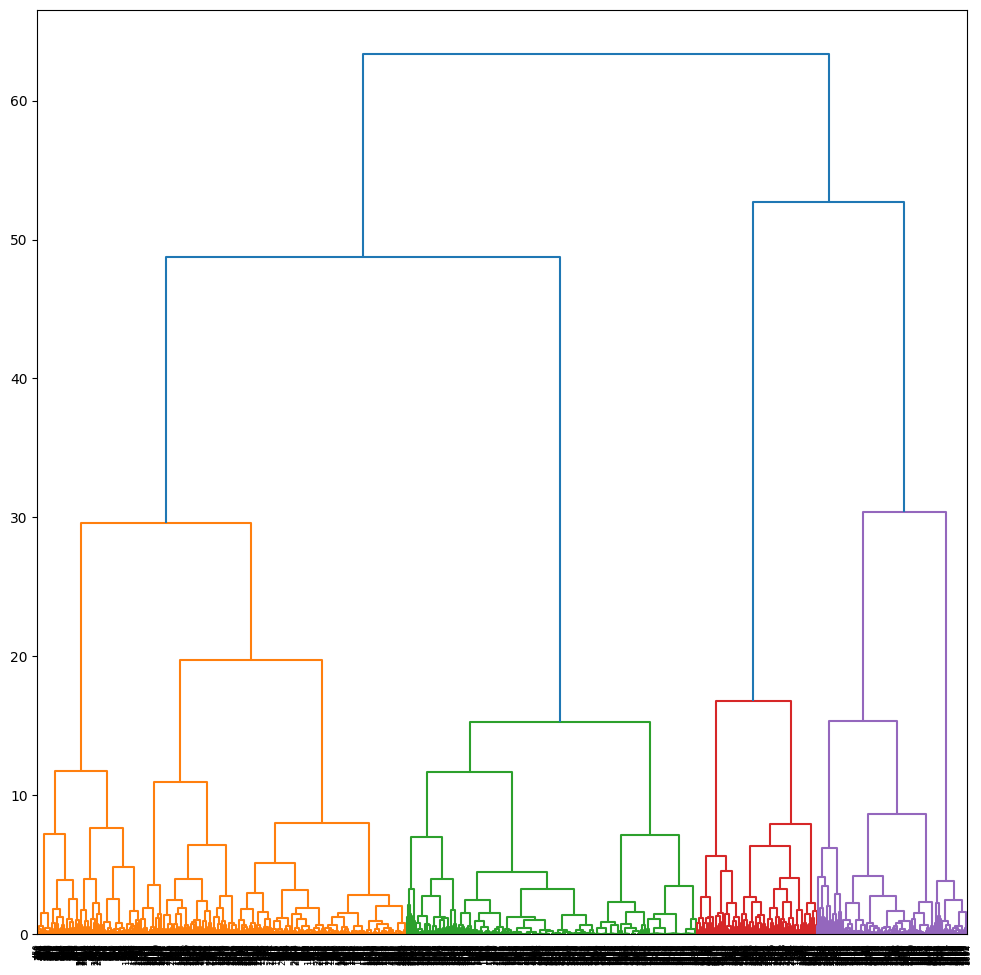

In [29]:

# grouping data based on Ward distance
standard_mergings_ward_fb = linkage(y = pca_rescaled_fb,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward_fb,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()

### Instantiating a k-Means Object with Five Clusters

In this section, we are instantiating a k-Means clustering object with the intention of creating five clusters. Below is a detailed explanation of the code:

1. **Instantiating a k-Means Object:**

   we are creating a k-Means clustering object named `facebook_k_pca_fb`. k-Means is a popular unsupervised learning algorithm used for clustering data points into a predefined number of clusters.

2. **Parameters:**

   - **Number of Clusters (`n_clusters`):**
     
     we are specifying the number of clusters to create as 3. This means the algorithm will aim to partition the data into 3 distinct clusters.

   - **Number of Initializations (`n_init`):**
     
     The parameter `n_init` determines the number of times the k-Means algorithm will run with different centroid seeds. Here, weve set it to 'auto', which typically means the algorithm will attempt to find a suitable number of initializations automatically.

   - **Random State (`random_state`):**
     
     Setting the `random_state` parameter to a specific value (`900` in this case) ensures reproducibility of the clustering results. It initializes the random number generator with a fixed seed value, so the same results can be obtained each time the code is executed.

By instantiating this k-Means object, were preparing to perform clustering on the  data, grouping similar data points together into clusters based on their features. This can be useful for tasks such as customer segmentation, anomaly detection, or pattern recognition.

In [30]:

# INSTANTIATING a k-Means object with five clusters
facebook_k_pca_fb = KMeans(n_clusters   = 3     ,
                         n_init       = 'auto',
                         random_state = 900   )

### Clustering Analysis with k-Means

In this section, were performing clustering analysis using the k-Means algorithm. Below is a detailed explanation of the code:

1. **Fitting the Model to the Data:**
   
   we are fitting the k-Means model (`facebook_k_pca_fb`) to the preprocessed data (`pca_rescaled_fb`). This step involves the algorithm iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of the assigned points.

2. **Converting Clusters to a DataFrame:**
   
   After fitting the model, were creating a DataFrame (`facebook_kmeans_pca_fb`) to store the cluster labels assigned to each data point. This DataFrame will have a single column named 'Cluster', containing the cluster labels.

3. **Checking the Results:**
   
   were using the `value_counts` method on the `facebook_kmeans_pca_fb` DataFrame to calculate the relative frequency of each cluster. This allows we to observe the distribution of data points among the clusters.

4. **Storing Cluster Centers:**
   
   The centroids of the clusters are stored in the variable `centroids_pca_fb`.

5. **Converting Cluster Centers to a DataFrame:**
   
   The cluster centers are converted into a DataFrame (`centroids_pca_df_fb`). Each row represents a cluster, and the columns represent the features' values at the centroid of each cluster.

6. **Renaming the Centroids:**
   
   The column names of the `centroids_pca_df_fb` DataFrame are renamed to describe the characteristics of each cluster. This provides insight into the interpretation of the cluster centers.



In [31]:

# fitting the object to the data
facebook_k_pca_fb.fit(pca_rescaled_fb)


# converting the clusters to a DataFrame
facebook_kmeans_pca_fb = pd.DataFrame({'Cluster': facebook_k_pca_fb.labels_})


# checking the results
facebook_kmeans_pca_fb.value_counts(normalize = True).round(decimals = 2)


# storing cluster centers
centroids_pca_fb = facebook_k_pca_fb.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_fb = pd.DataFrame(centroids_pca_fb).round(decimals = 2)

# renaming the centroids
centroids_pca_df_fb.columns = ['Low Activity Level',
                           'Moderate Activity Level',
                           'High Activity Level']


### Analyzing Results and Merging Data

In this section, were analyzing the clustering results and merging various datasets. Below is a detailed explanation of the code:

1. **Checking Centroids DataFrame:**
   
   were rounding the values in the DataFrame `centroids_pca_df_fb` to two decimal places to get a clearer view of the cluster centers.

2. **Concatenating Cluster Memberships with Principal Components:**
   
   were concatenating the cluster memberships (`facebook_kmeans_pca_fb`) with the principal components (`factor_loadings_df_fb`) using `pd.concat()`. This combines the cluster labels with the original features, enabling further analysis.

3. **Concatenating Demographic Information with PCA-Clusters:**
   
   Next, were concatenating demographic information from the `data_fb` DataFrame with the PCA-clustered data (`clst_pca_df_fb`). This step helps merge additional contextual information with the clustered data.

4. **Renaming Columns:**
   
   were renaming the columns of the `final_df_fb` DataFrame to provide descriptive names for clarity. The columns include 'status_type', 'time_published', 'Cluster', and the principal components.

5. **Checking the Results:**
   
   Finally, were printing the first seven rows of the merged DataFrame (`final_df_fb`) to inspect the results. This allows we to verify the correctness of the merged dataset.



In [32]:


# checking results (clusters = rows, pc = columns)
centroids_pca_df_fb.round(2)



# concatenating cluster memberships with principal components
clst_pca_df_fb = pd.concat([facebook_kmeans_pca_fb,
                     factor_loadings_df_fb],
                    axis = 1)


# concatenating demographic information with pca-clusters
final_df_fb = pd.concat([data_fb.loc[ : , [ 'status_type','time_published']],
                  clst_pca_df_fb.round(decimals = 2)],
                  axis = 1)


# renaming columns
final_df_fb.columns = ['status_type', 'time_published', 'Cluster',
                'Involvement Base', 'Affective Attachment',
                'Interactive Participation Progression']

# checking the results
print(final_df_fb.head(n = 7))


  status_type      time_published  Cluster  Involvement Base  Affective Attachment  Interactive Participation Progression
0       video 2018-04-22 06:00:00        2              4.16                 -0.65                                   0.07
1       photo 2018-04-18 03:22:00        1             -0.41                  0.35                                   0.41
2       video 2018-04-18 00:24:00        2              4.18                 -0.72                                   0.14
3       photo 2018-04-11 04:53:00        0              0.40                  0.73                                  -0.29
4       photo 2018-04-09 02:06:00        2              0.94                  0.11                                   2.21
5       photo 2018-04-08 05:10:00        2              1.54                  0.23                                   1.59
6       photo 2018-04-05 09:23:00        2              1.20                  0.49                                   1.85


### Creating Dummy Variables

In this section, were creating dummy variables based on the categorical variable 'status_type' in the DataFrame `final_df_fb`. Below is a detailed explanation of the code:

1. **Creating Dummy Variables:**
   
   Using the `pd.get_dummies()` function, were creating dummy variables for the categorical variable 'status_type' in the DataFrame `final_df_fb`. This function converts categorical variables into dummy/indicator variables, where each distinct category becomes a binary column.

2. **Creating a New Column 'video_or_not':**
   
   were creating a new column named 'video_or_not' in the `final_df_fb` DataFrame. This column will have a value of 1 if the status type is 'video' and 0 otherwise. The `.astype(int)` method is used to convert boolean values to integers.

3. **Displaying the DataFrame:**
   
   Finally, were displaying the first five rows of the modified DataFrame (`final_df_fb`) using the `.head()` method to inspect the changes and verify the correctness of the new 'video_or_not' column.



In [33]:

# Create dummy variables
status_type_dummies_fb = pd.get_dummies(final_df_fb['status_type'])

# Create a new column 'video_or_not' which will be 1 if the status_type is 'video' and 0
final_df_fb['video_or_not'] = (status_type_dummies_fb['video'] == 1).astype(int)

final_df_fb.head(n=5)


,status_type,time_published,Cluster,Involvement Base,Affective Attachment,Interactive Participation Progression,video_or_not
0,video,2018-04-22 06:00:00,2,4.16,-0.65,0.07,1
1,photo,2018-04-18 03:22:00,1,-0.41,0.35,0.41,0
2,video,2018-04-18 00:24:00,2,4.18,-0.72,0.14,1
3,photo,2018-04-11 04:53:00,0,0.40,0.73,-0.29,0
4,photo,2018-04-09 02:06:00,2,0.94,0.11,2.21,0


### Renaming Categorical Variables

In this section, were renaming categorical variables in the DataFrame `final_df_fb`. Below is a detailed explanation of the code:

1. **Renaming 'video_or_not' Column:**
   
   were creating a dictionary `type_names_fb` where the keys represent the original values of the 'video_or_not' column (0 and 1), and the values represent the corresponding renamed categories ('No video' and 'Video', respectively). Then, were using the `.replace()` method to replace the original values in the 'video_or_not' column with the new category names.

2. **Renaming 'Cluster' Column:**
   
   Similarly, were creating a dictionary `cluster_names_fb` where the keys represent the original cluster labels (0, 1, and 2), and the values represent the corresponding renamed clusters ('1', '2', and '3', respectively). Then, were using the `.replace()` method to replace the original cluster labels in the 'Cluster' column with the new cluster names.

3. **Checking Results:**
   
   Finally, were displaying the first five rows of the modified DataFrame (`final_df_fb`) using the `.head()` method to verify the correctness of the renamed columns.

By renaming categorical variables, were providing more descriptive labels that are easier to interpret and understand. This can enhance the clarity and readability of the data, making it more accessible for analysis and interpretation.

In [34]:
# renaming status type
type_names_fb = {1 : 'Video',
              0 : 'No video'}


final_df_fb['video_or_not'].replace(type_names_fb, inplace = True)


# renaming clusters
cluster_names_fb = {0 : '1',
             1 : '2',
             2 : '3'}


final_df_fb['Cluster'].replace(cluster_names_fb, inplace = True)


# checking results
final_df_fb.head(n = 5)

,status_type,time_published,Cluster,Involvement Base,Affective Attachment,Interactive Participation Progression,video_or_not
0,video,2018-04-22 06:00:00,3,4.16,-0.65,0.07,Video
1,photo,2018-04-18 03:22:00,2,-0.41,0.35,0.41,No video
2,video,2018-04-18 00:24:00,3,4.18,-0.72,0.14,Video
3,photo,2018-04-11 04:53:00,1,0.40,0.73,-0.29,No video
4,photo,2018-04-09 02:06:00,3,0.94,0.11,2.21,No video


### Dynamic Summary for Each Cluster

In this section, dynamic strings are generated to summarize each cluster's observations, centroids, and distribution of status types. Below is a detailed explanation of the code:

1. **Cluster 1 Summary:**

   - **Observations:**
     
     Calculates the proportion of observations belonging to Cluster 1 out of the total observations in the dataset.

   - **Centroids:**
     
     Displays the centroid values for Cluster 1.

   - **Status Type Distribution:**
     
     Shows the distribution of status types within Cluster 1, normalized and rounded to two decimal places.

2. **Cluster 2 Summary:**

   - **Observations:**
     
     Calculates the proportion of observations belonging to Cluster 2 out of the total observations in the dataset.

   - **Centroids:**
     
     Displays the centroid values for Cluster 2.

   - **Status Type Distribution:**
     
     Shows the distribution of status types within Cluster 2, normalized and rounded to two decimal places.

3. **Cluster 3 Summary:**

   - **Observations:**
     
     Calculates the proportion of observations belonging to Cluster 3 out of the total observations in the dataset.

   - **Centroids:**
     
     Displays the centroid values for Cluster 3.

   - **Status Type Distribution:**
     
     Shows the distribution of status types within Cluster 3, normalized and rounded to two decimal places.



In [35]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\

# 1 CLUSTER
Observations
{round(len(final_df_fb.loc[ : , "Cluster"][final_df_fb.loc[ : , "Cluster"] == '1']) /
   len(final_df_fb), ndigits = 2)}


Centroids
{centroids_pca_df_fb.loc[ 0 , :].to_string(dtype = False, name = False)}


Status type
{final_df_fb.loc[ : , "status_type"][ final_df_fb.loc[ : , 'Cluster' ] == '1']

     .value_counts(normalize = True)
     .round(decimals = 2)
     .sort_index().to_string(dtype = False, name = False)}

""")




# dynamic string with value counts for each demographic (cluster 2)
print(f"""\

# 2 CLUSTER

Observations
{round(len(final_df_fb.loc[ : , "Cluster"][final_df_fb.loc[ : , "Cluster"] == '2']) /
   len(final_df_fb), ndigits = 2)}


Centroids
{centroids_pca_df_fb.loc[ 1 , :].to_string(dtype = False, name = False)}


Status Type
{final_df_fb.loc[ : , "status_type"][ final_df_fb.loc[ : , 'Cluster' ] == '2']

     .value_counts(normalize = True)
     .round(decimals = 2)
     .sort_index().to_string(dtype = False, name = False)}

""")



# dynamic string with value counts for each demographic (cluster 3)
print(f"""\
# 3 CLUSTER

Observations
{round(len(final_df_fb.loc[ : , "Cluster"][final_df_fb.loc[ : , "Cluster"] == '3']) /
   len(final_df_fb), ndigits = 2)}


Centroids
{centroids_pca_df_fb.loc[ 2 , :].to_string(dtype = False, name = False)}


Status Type
{final_df_fb.loc[ : , "status_type"][ final_df_fb.loc[ : , 'Cluster' ] == '3']

     .value_counts(normalize = True)
     .round(decimals = 2)
     .sort_index().to_string(dtype = False, name = False)}
""")



# 1 CLUSTER 
Observations
0.28


Centroids
Low Activity Level         0.19
Moderate Activity Level    1.03
High Activity Level       -0.73


Status type
photo    0.49
text     0.11
video    0.40



# 2 CLUSTER

Observations
0.46


Centroids
Low Activity Level        -0.80
Moderate Activity Level   -0.42
High Activity Level       -0.14


Status Type
photo    0.73
text     0.04
video    0.23


# 3 CLUSTER 

Observations
0.26


Centroids
Low Activity Level         1.23
Moderate Activity Level   -0.38
High Activity Level        1.06


Status Type
photo    0.49
text     0.05
video    0.47



### Preparing Data for Regression

In this section, were preparing the data for regression analysis. Below is a detailed explanation of the code:

1. **Creating Dummy Variables for 'status_type':**

   Using `pd.get_dummies()`, dummy variables are created for the categorical variable 'status_type' in the DataFrame `final_df_fb`. This creates binary columns representing each category of 'status_type'.

2. **Creating 'video_or_not' Column:**

   A new column named 'video_or_not' is created in `final_df_fb`, which is set to 1 if the status type is 'video', and 0 otherwise. This column serves as the target variable for regression analysis.

3. **Information about DataFrame:**

   `final_df_fb.info()` is called to display information about the DataFrame, including the data types and memory usage.

4. **Creating Facebook Final DataFrame:**

   The DataFrame `facebook_final_fb` is created by dropping the 'status_type' column from `final_df_fb` using `.drop()`. This DataFrame will be used for regression analysis.

5. **Creating Regression DataFrame:**

   A regression DataFrame `regression_df_fb` is created by concatenating `scaled_data_fb`. However, it seems there might be a typo as `scaled_data_fb` is not defined in the provided code snippet.

6. **Normalizing Regression DataFrame:**

   The regression DataFrame `regression_df_fb` is scaled using the `normalize_dataframe()` function, which is expected to normalize the data to ensure consistent scales across features.

7. **Splitting Data into Training and Testing Sets:**

   The `x_data_fb` and `y_data_fb` are separated into training and testing sets using `train_test_split()`. This function splits the data into random train and test subsets. Here, 70% of the data is used for training (`x_train_fb` and `y_train_fb`), and 30% for testing (`x_test_fb` and `y_test_fb`). Additionally, the parameter `stratify = y_data_fb` ensures that the class distribution is maintained in the train-test split.



In [36]:
# Convert 'status_type' column into dummy variables
status_type_dummies_fb = pd.get_dummies(final_df_fb['status_type'])

# Create a new binary column 'video_or_not' indicating whether the status_type is 'video'
final_df_fb['video_or_not'] = (status_type_dummies_fb['video'] == 1).astype(int)

# Display information about the final dataframe
final_df_fb.info()


# Drop the 'status_type' column from the final dataframe
facebook_final_fb = final_df_fb.drop('status_type', axis=1)


# Concatenate the scaled data dataframe for regression
regression_df_fb = pd.concat([scaled_data_fb])

# Normalize the concatenated dataframe
regression_df_scaled_fb = normalize_dataframe(regression_df_fb)

# Split data into training and testing sets
x_data_fb = regression_df_scaled_fb
y_data_fb = final_df_fb['video_or_not']
x_train_fb, x_test_fb, y_train_fb, y_test_fb = train_test_split(x_data_fb,
                                                    y_data_fb,
                                                    test_size=0.30,
                                                    random_state=900,
                                                    stratify=y_data_fb)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   status_type                            2297 non-null   object        
 1   time_published                         2297 non-null   datetime64[ns]
 2   Cluster                                2297 non-null   object        
 3   Involvement Base                       2297 non-null   float64       
 4   Affective Attachment                   2297 non-null   float64       
 5   Interactive Participation Progression  2297 non-null   float64       
 6   video_or_not                           2297 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 125.7+ KB


### Logistic Regression Model Evaluation

In this section, were evaluating a logistic regression model for predicting the 'video_or_not' column based on the features in the training and testing sets. Below is a detailed explanation of the code:

1. **Instantiating Logistic Regression Model:**

   were instantiating a logistic regression model (`model_fb`) using `sklearn.linear_model.LogisticRegression`. The parameters include the solver (`'lbfgs'`), regularization strength (`C = 1`), and a fixed `random_state` for reproducibility.

2. **Fitting the Training Data:**

   The logistic regression model is fitted to the training data (`x_train_fb` and `y_train_fb`) using the `fit()` method.

3. **Predicting on the Testing Set:**

   The fitted model is used to predict the target variable for the testing set (`x_test_fb`) using the `predict()` method.

4. **Model Evaluation:**

   - **Train-Test Gap:**
     
     The absolute difference between the training and testing accuracies (`train_acc_fb` and `test_acc_fb`) is calculated and rounded to three decimal places. This gap provides insight into the model's generalization performance.
   
   - **Test AUC Score:**
     
     The area under the receiver operating characteristic curve (ROC AUC score) is computed using `roc_auc_score()`. This metric evaluates the model's ability to distinguish between positive and negative classes. The score is rounded to three decimal places.

5. **Printing Results:**

   The train-test gap and test AUC score are printed for evaluation.



In [37]:
# INSTANTIATING a logistic regression model
model_fb = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 900)


# FITTING the training data
model_fit_fb = model_fb.fit(x_train_fb, y_train_fb)


# PREDICTING based on the testing set
model_pred_fb = model_fit_fb.predict(x_test_fb) # predict_proba for multiclass


# checking results
train_acc_fb = model_fit_fb.score(x_train_fb, y_train_fb)
test_acc_fb  = model_fit_fb.score(x_test_fb , y_test_fb )
roc_score_fb = roc_auc_score  (y_true      = y_test_fb,
                            y_score     = model_pred_fb)


print(f"""
Train-Test Gap: {round(abs(train_acc_fb - test_acc_fb), 3)}
Test AUC Score: {round(roc_score_fb,3)}
""")


Train-Test Gap: 0.006
Test AUC Score: 0.729



### Confusion Matrix Analysis

In this section, were unpacking and analyzing the confusion matrix to evaluate the performance of the logistic regression model. Below is a detailed explanation of the code:

1. **Unpacking the Confusion Matrix:**

   The confusion matrix is unpacked using the `confusion_matrix()` function from scikit-learn. It computes the confusion matrix based on the true labels (`y_true`) and the predicted labels (`y_pred`) generated by the logistic regression model. The `ravel()` function is then used to flatten the matrix into a 1D array, and the four elements are unpacked into variables representing the counts of true negatives, false positives, false negatives, and true positives.

2. **Printing Results:**

   Each element of the confusion matrix is printed individually along with a descriptive label:

   - **True Negatives (`model_tn_fb`):**
     
     The number of observations that were correctly predicted as not being videos.
   
   - **False Positives (`model_fp_fb`):**
     
     The number of observations that were incorrectly predicted as being videos when they are not.
   
   - **False Negatives (`model_fn_fb`):**
     
     The number of observations that were incorrectly predicted as not being videos when they are.
   
   - **True Positives (`model_tp_fb`):**
     
     The number of observations that were correctly predicted as being videos.



In [38]:
# unpacking the confusion matrix
model_tn_fb, \
model_fp_fb, \
model_fn_fb, \
model_tp_fb = confusion_matrix(y_true = y_test_fb, y_pred = model_pred_fb).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn_fb}
False Positives: {model_fp_fb}
False Negatives: {model_fn_fb}
True Positives : {model_tp_fb}
""")


True Negatives : 429
False Positives: 27
False Negatives: 113
True Positives : 121



### Logistic Regression Model Evaluation on Principal Components

In this section, were evaluating a logistic regression model trained on principal components (PCs) instead of the original features. Below is a detailed explanation of the code:

1. **Preparing Data:**

   - **Creating Principal Components DataFrame:**
     
     The principal components obtained from the dimensionality reduction technique (such as PCA) are stored in a DataFrame `pc_df_fb`.
   
   - **Normalizing Principal Components:**
     
     The principal components DataFrame `pc_df_fb` is normalized using the `normalize_dataframe()` function to ensure consistent scales across features.

   - **Defining Features and Target:**
     
     The normalized principal components (`x_data_fb`) are assigned as the features, and the 'video_or_not' column from `final_df_fb` is assigned as the target variable (`y_data_fb`).

   - **Splitting Data into Training and Testing Sets:**
     
     The features and target variables are split into training and testing sets using `train_test_split()`. Here, 70% of the data is used for training (`x_train_fb` and `y_train_fb`), and 30% for testing (`x_test_fb` and `y_test_fb`). Additionally, the parameter `stratify = y_data_fb` ensures that the class distribution is maintained in the train-test split.

2. **Instantiating Logistic Regression Model:**

   A logistic regression model (`model_fb`) is instantiated with parameters including the solver (`'lbfgs'`), regularization strength (`C = 1`), and a fixed `random_state` for reproducibility.

3. **Fitting the Training Data:**

   The logistic regression model is fitted to the training data (`x_train_fb` and `y_train_fb`) using the `fit()` method.

4. **Predicting on the Testing Set:**

   The fitted model is used to predict the target variable for the testing set (`x_test_fb`) using the `predict()` method.

5. **Model Evaluation:**

   - **Train-Test Gap:**
     
     The absolute difference between the training and testing accuracies (`train_acc_fb` and `test_acc_fb`) is calculated and rounded to three decimal places. This gap provides insight into the model's generalization performance.
   
   - **Test AUC Score:**
     
     The area under the receiver operating characteristic curve (ROC AUC score) is computed using `roc_auc_score()`. This metric evaluates the model's ability to distinguish between positive and negative classes. The score is rounded to three decimal places.



In [39]:
# Create a DataFrame for principal components
pc_df_fb = pd.DataFrame(principal_components_fb)

# Normalize the principal components DataFrame
pc_scaled_fb = normalize_dataframe(pc_df_fb)

# Define x_data and y_data for logistic regression
x_data_fb = pc_scaled_fb
y_data_fb = final_df_fb['video_or_not']

# Split data into training and testing sets
x_train_fb, x_test_fb, y_train_fb, y_test_fb = train_test_split(x_data_fb,
                                                    y_data_fb,
                                                    test_size=0.30,
                                                    random_state=900,
                                                    stratify=y_data_fb)

# Instantiate a logistic regression model
model_fb = sklearn.linear_model.LogisticRegression(solver='lbfgs',
                                                C=1,
                                                random_state=900)

# Fit the training data to the model
model_fit_fb = model_fb.fit(x_train_fb, y_train_fb)

# Predict based on the testing set
model_pred_fb = model_fit_fb.predict(x_test_fb)

# Calculate and print model performance metrics
train_acc_fb = model_fit_fb.score(x_train_fb, y_train_fb)
test_acc_fb = model_fit_fb.score(x_test_fb, y_test_fb)
roc_score_fb = roc_auc_score(y_true=y_test_fb, y_score=model_pred_fb)

print(f"""
Train-Test Gap: {round(abs(train_acc_fb - test_acc_fb), 3)}
Test AUC Score: {round(roc_score_fb, 3)}
""")



Train-Test Gap: 0.018
Test AUC Score: 0.692



### Confusion Matrix Analysis

In this section, the confusion matrix is unpacked and analyzed to evaluate the performance of the logistic regression model trained on principal components. Below is a detailed explanation of the code:

1. **Unpacking the Confusion Matrix:**

   The confusion matrix is unpacked using the `confusion_matrix()` function from scikit-learn. It computes the confusion matrix based on the true labels (`y_true`) and the predicted labels (`y_pred`) generated by the logistic regression model. The `ravel()` function is then used to flatten the matrix into a 1D array, and the four elements are unpacked into variables representing the counts of true negatives, false positives, false negatives, and true positives.

2. **Printing Results:**

   Each element of the confusion matrix is printed individually along with a descriptive label:

   - **True Negatives (`model_tn_fb`):**
     
     The number of observations that were correctly predicted as not being videos.
   
   - **False Positives (`model_fp_fb`):**
     
     The number of observations that were incorrectly predicted as being videos when they are not.
   
   - **False Negatives (`model_fn_fb`):**
     
     The number of observations that were incorrectly predicted as not being videos when they are.
   
   - **True Positives (`model_tp_fb`):**
     
     The number of observations that were correctly predicted as being videos.



In [40]:
# Unpack the confusion matrix
model_tn_fb, model_fp_fb, model_fn_fb, model_tp_fb = confusion_matrix(y_true=y_test_fb, y_pred=model_pred_fb).ravel()

# Print each result one-by-one
print(f"""
True Negatives : {model_tn_fb}
False Positives: {model_fp_fb}
False Negatives: {model_fn_fb}
True Positives : {model_tp_fb}
""")



True Negatives : 432
False Positives: 24
False Negatives: 132
True Positives : 102



### Logistic Regression Model Evaluation with Cluster Results

In this section, were evaluating a logistic regression model using the cluster results obtained from k-means clustering as features. Below is a detailed explanation of the code:

1. **Factorizing Cluster Results:**

   The cluster labels (`Cluster`) obtained from k-means clustering (`facebook_kmeans_pca_fb`) are factorized into dummy variables using `pd.get_dummies()`. The `drop_first` parameter is set to `True` to avoid multicollinearity, and the resulting DataFrame is cast to integer type.

2. **Checking Cluster Distribution:**

   The distribution of clusters in the dataset is checked using `.value_counts()` on the factorized cluster DataFrame (`cluster_df_fb`). The results are sorted in descending order.

3. **Selecting Features and Target:**

   The factorized cluster DataFrame (`x_data_fb`) is selected as the features, and the 'video_or_not' column from `final_df_fb` is selected as the target variable (`y_data_fb`).

4. **Splitting Data into Training and Testing Sets:**

   The features and target variables are split into training and testing sets using `train_test_split()`. Here, 70% of the data is used for training (`x_train_fb` and `y_train_fb`), and 30% for testing (`x_test_fb` and `y_test_fb`). Additionally, the parameter `stratify = y_data_fb` ensures that the class distribution is maintained in the train-test split.

5. **Instantiating Logistic Regression Model:**

   A logistic regression model (`model_fb`) is instantiated with parameters including the solver (`'lbfgs'`), regularization strength (`C = 1`), class weights (`'balanced'` for handling class imbalance), and a fixed `random_state` for reproducibility.

6. **Fitting the Training Data:**

   The logistic regression model is fitted to the training data (`x_train_fb` and `y_train_fb`) using the `fit()` method.

7. **Predicting on the Testing Set:**

   The fitted model is used to predict the target variable for the testing set (`x_test_fb`) using the `predict()` method.

8. **Model Evaluation:**

   - **Train-Test Gap:**
     
     The absolute difference between the training and testing accuracies (`train_acc_fb` and `test_acc_fb`) is calculated and rounded to three decimal places. This gap provides insight into the model's generalization performance.
   
   - **Test AUC Score:**
     
     The area under the receiver operating characteristic curve (ROC AUC score) is computed using `roc_auc_score()`. This metric evaluates the model's ability to distinguish between positive and negative classes. The score is rounded to three decimal places.



In [41]:
# factorizing cluster results
cluster_df_fb = pd.get_dummies(data       = facebook_kmeans_pca_fb['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df_fb.value_counts(normalize = False).sort_index(ascending = False)


# selecting x- and y-data
x_data_fb = cluster_df_fb
y_data_fb = final_df_fb['video_or_not']


# training and testing sets
x_train_fb, x_test_fb, y_train_fb, y_test_fb = train_test_split(x_data_fb,
                                                    y_data_fb,
                                                    test_size    = 0.30,
                                                    random_state = 900,
                                                    stratify     = y_data_fb)


# INSTANTIATING a logistic regression model
model_fb = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                class_weight = 'balanced', # affects more the confusion matrix
                                                random_state = 900)


# FITTING the training data
model_fit_fb = model_fb.fit(x_train_fb, y_train_fb)


# PREDICTING based on the testing set
model_pred_fb = model_fit_fb.predict(x_test_fb) # predict_proba for multiclass


# checking results
train_acc_fb = model_fit_fb.score(x_train_fb, y_train_fb)
test_acc_fb  = model_fit_fb.score(x_test_fb , y_test_fb )
roc_score_fb = roc_auc_score  (y_true  = y_test_fb,
                            y_score = model_pred_fb)


print(f"""
Train-Test Gap: {round(abs(train_acc_fb - test_acc_fb),3)}
Test AUC Score: {round(roc_score_fb,3)}
""")




Train-Test Gap: 0.015
Test AUC Score: 0.595



### Detailed Explanation and Insights:

#### Logistic Regression Model Training:
- **Data Preparation:** The cluster results obtained from k-means clustering, after PCA dimensionality reduction, are one-hot encoded to create dummy variables for each cluster.
- **Target Variable:** The target variable 'video_or_not' is selected from the final dataset.
- **Train-Test Split:** The dataset is split into training and testing sets, with 70% used for training and 30% for testing. Stratification is applied to ensure a balanced distribution of the target variable in both sets.
- **Logistic Regression Model:** A logistic regression model is instantiated with specified parameters, including the solver, regularization parameter (C), and class weights to handle class imbalance.
- **Model Fitting:** The logistic regression model is fitted to the training data.

#### Model Evaluation:
- **Prediction:** The model predicts the target variable based on the testing set.
- **Accuracy Scores:** The accuracy scores are calculated for both the training and testing sets to evaluate the model's performance.
- **Train-Test Gap:** The absolute difference between the training and testing accuracies is calculated to assess overfitting or underfitting.
- **Area Under the ROC Curve (AUC):** The AUC score is computed to measure the model's ability to distinguish between positive and negative classes.

#### Interpretation of Results:
- **Train-Test Gap:** The small train-test gap (0.015) indicates minimal overfitting or underfitting, suggesting that the model generalizes well to unseen data.
- **Test AUC Score:** The AUC score of 0.595 indicates that the model performs slightly better than random guessing (AUC = 0.5), but it may not be highly effective in discriminating between the two classes.

### Insights:
- **Model Performance:** While the logistic regression model shows moderate performance, there is room for improvement, as indicated by the AUC score below 0.6.
- **Feature Importance:** Further analysis of feature importance or exploring different classification algorithms may enhance the model's predictive power.
- **Refinement:** Fine-tuning hyperparameters or incorporating additional features could potentially improve model accuracy and predictive performance.
- **Consideration:** It's essential to carefully evaluate the model's performance metrics and consider domain knowledge to make informed decisions about further model refinement or deployment.

### Confusion Matrix Analysis

In this section, the confusion matrix is unpacked and analyzed to evaluate the performance of the logistic regression model trained with cluster results as features. Below is a detailed explanation of the code:

1. **Unpacking the Confusion Matrix:**

   The confusion matrix is unpacked using the `confusion_matrix()` function from scikit-learn. It computes the confusion matrix based on the true labels (`y_true`) and the predicted labels (`y_pred`) generated by the logistic regression model. The `ravel()` function is then used to flatten the matrix into a 1D array, and the four elements are unpacked into variables representing the counts of true negatives, false positives, false negatives, and true positives.

2. **Printing Results:**

   Each element of the confusion matrix is printed individually along with a descriptive label:

   - **True Negatives (`model_tn_fb`):**
     
     The number of observations that were correctly predicted as not being videos.
   
   - **False Positives (`model_fp_fb`):**
     
     The number of observations that were incorrectly predicted as being videos when they are not.
   
   - **False Negatives (`model_fn_fb`):**
     
     The number of observations that were incorrectly predicted as not being videos when they are.
   
   - **True Positives (`model_tp_fb`):**
     
     The number of observations that were correctly predicted as being videos.

By analyzing the confusion matrix, we gain insights into the model's performance in terms of correctly and incorrectly classified instances. This information is crucial for understanding the model's strengths and weaknesses and can guide further adjustments or improvements.

In [42]:


# unpacking the confusion matrix
model_tn_fb, model_fp_fb, model_fn_fb, model_tp_fb = confusion_matrix(y_true = y_test_fb, y_pred = model_pred_fb).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn_fb}
False Positives: {model_fp_fb}
False Negatives: {model_fn_fb}
True Positives : {model_tp_fb}
""")





True Negatives : 246
False Positives: 210
False Negatives: 82
True Positives : 152




- **True Negatives (TN)**: The number of negative instances (actual negatives) that were correctly classified by the model as negative. In the context of the problem, it represents the number of observations that were correctly predicted as not belonging to the positive class.

- **False Positives (FP)**: The number of negative instances (actual negatives) that were incorrectly classified by the model as positive. In the context of the problem, it represents the number of observations that were incorrectly predicted as belonging to the positive class when they actually don't.

- **False Negatives (FN)**: The number of positive instances (actual positives) that were incorrectly classified by the model as negative. In the context of the problem, it represents the number of observations that were incorrectly predicted as not belonging to the positive class when they actually do.

- **True Positives (TP)**: The number of positive instances (actual positives) that were correctly classified by the model as positive. In the context of the problem, it represents the number of observations that were correctly predicted as belonging to the positive class.

So, in the  case:

- True Negatives: 246
- False Positives: 210
- False Negatives: 82
- True Positives: 152

These values provide insights into the performance of the model in terms of correctly identifying instances of the positive class (True Positives) and avoiding misclassifications (False Positives and False Negatives) relative to the negative class (True Negatives).